# **Bank Customer Churn Prediction**
[Link Dataset](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction?datasetId=2008274&sortBy=voteCount)

**Context**
- It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

**Content**
- Various Bank detail is given like CustomerID , surname, Credit score and many more.


In [1]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

100%|█████████████████████████████████████████| 262k/262k [00:00<00:00, 454kB/s]
100%|█████████████████████████████████████████| 262k/262k [00:00<00:00, 454kB/s]


In [2]:
!unzip bank-customer-churn-prediction

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [80]:
import pandas as pd

df = pd.read_csv('./Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
df['Exited'].loc[:10]

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
Name: Exited, dtype: int64

In [9]:
df.describe(include='all').loc['unique']

CreditScore        NaN
Geography            3
Gender               2
Age                NaN
Tenure             NaN
Balance            NaN
NumOfProducts      NaN
HasCrCard          NaN
IsActiveMember     NaN
EstimatedSalary    NaN
Exited             NaN
Name: unique, dtype: object

In [82]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [83]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=42)

In [84]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [85]:
X_train.size

77000

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
import tensorflow
from tensorflow import keras
from keras import layers


In [88]:
model = keras.Sequential()

model.add(layers.Dense(11,activation='sigmoid',input_dim=11))
model.add(layers.Dense(11,activation='sigmoid'))
model.add(layers.Dense(1,activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [91]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)


Epoch 1/100


112/112 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.4968 - val_loss: 0.5798 - val_accuracy: 0.7943
Epoch 2/100
112/112 [==============================] - 0s 498us/step - loss: 0.5407 - accuracy: 0.7920 - val_loss: 0.5135 - val_accuracy: 0.7943
Epoch 3/100
112/112 [==============================] - 0s 524us/step - loss: 0.5123 - accuracy: 0.7920 - val_loss: 0.5037 - val_accuracy: 0.7943
Epoch 4/100
112/112 [==============================] - 0s 484us/step - loss: 0.5074 - accuracy: 0.7920 - val_loss: 0.5018 - val_accuracy: 0.7943
Epoch 5/100
112/112 [==============================] - 0s 491us/step - loss: 0.5068 - accuracy: 0.7920 - val_loss: 0.5005 - val_accuracy: 0.7943
Epoch 6/100
112/112 [==============================] - 0s 517us/step - loss: 0.5062 - accuracy: 0.7920 - val_loss: 0.4998 - val_accuracy: 0.7943
Epoch 7/100
112/112 [==============================] - 0s 501us/step - loss: 0.5058 - accuracy: 0.7920 - val_loss: 0.4994 - val_accuracy: 0.7943

In [93]:
X_test = X_test.astype('float32')
y_test= y_test.astype('float32')

In [94]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 263us/step


In [95]:
y_pred

array([[0.23591934],
       [0.14042266],
       [0.14042266],
       ...,
       [0.22527424],
       [0.14042266],
       [0.23591934]], dtype=float32)

In [96]:
y_pred = y_pred.argmax(axis=-1)


In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8053333333333333

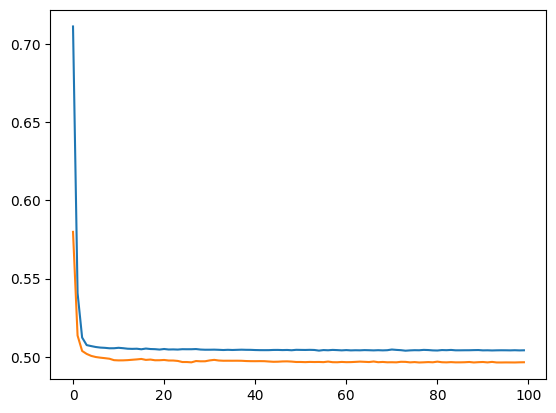

In [98]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

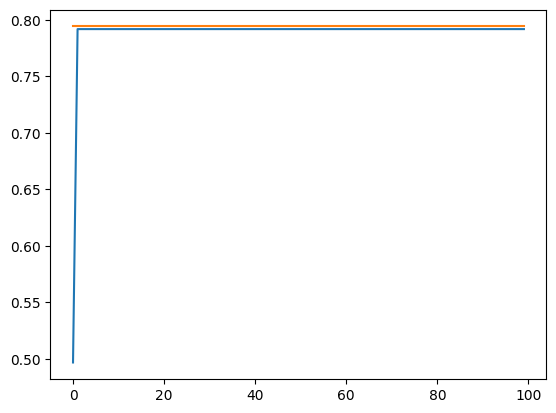

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

array([[2416,    0],
       [ 584,    0]])

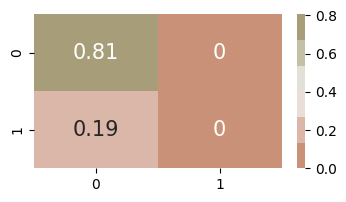

In [100]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
cmap1 = sns.diverging_palette(751,75,  s=40, l=65, n=6)
plt.subplots(figsize=(4,2))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
cf_matrix

In [120]:
count_of_0 = np.sum(y_test.values == 0)
print("Total count of 0:", count_of_0)
count_of_1 = np.sum(y_test.values == 1)
print("Total count of 1:", count_of_1)


Total count of 0: 2416
Total count of 1: 584


## Model 2

In [49]:
model2 = keras.Sequential()

model2.add(layers.Dense(16,activation='relu',input_dim=11))
model2.add(layers.Dense(8,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

In [50]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                192       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [52]:
history = model2.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 0s 931us/step - loss: 2943.1697 - accuracy: 0.6396 - val_loss: 92.8341 - val_accuracy: 0.7207
Epoch 2/100
112/112 [==============================] - 0s 473us/step - loss: 167.9312 - accuracy: 0.6730 - val_loss: 218.8452 - val_accuracy: 0.5336
Epoch 3/100
112/112 [==============================] - 0s 488us/step - loss: 158.6588 - accuracy: 0.6754 - val_loss: 118.1950 - val_accuracy: 0.6107
Epoch 4/100
112/112 [==============================] - 0s 459us/step - loss: 141.8891 - accuracy: 0.6770 - val_loss: 187.0173 - val_accuracy: 0.7764
Epoch 5/100
112/112 [==============================] - 0s 518us/step - loss: 146.7720 - accuracy: 0.6825 - val_loss: 79.1196 - val_accuracy: 0.7971
Epoch 6/100
112/112 [==============================] - 0s 489us/step - loss: 133.0854 - accuracy: 0.6795 - val_loss: 76.2949 - val_accuracy: 0.6643
Epoch 7/100
112/112 [==============================] - 0s 489us/step - loss: 148.6957 - accuracy: 0.6720 - v

In [53]:
y_pred2 = model2.predict(X_test)

94/94 [==============================] - 0s 283us/step


In [54]:
y_pred2 = y_pred2.argmax(axis=-1)


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8053333333333333

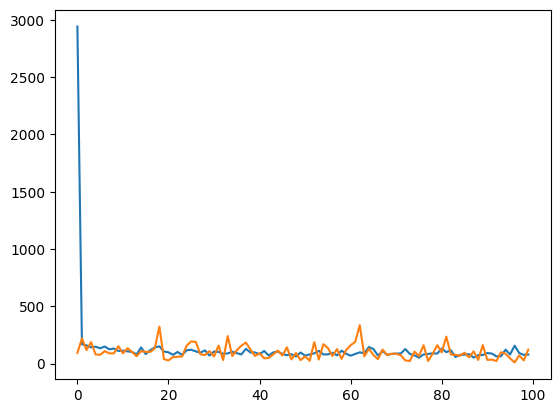

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

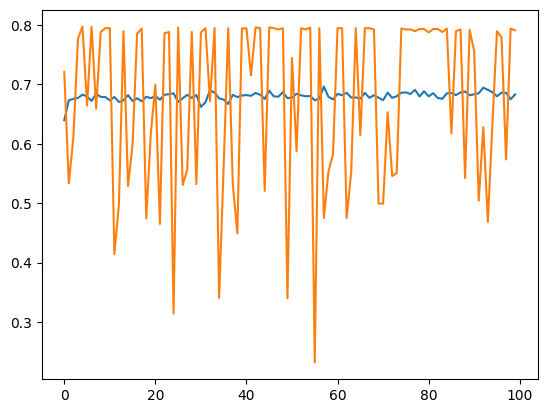

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [101]:
import seaborn as sns
import numpy as np

array([[2416,    0],
       [ 584,    0]])

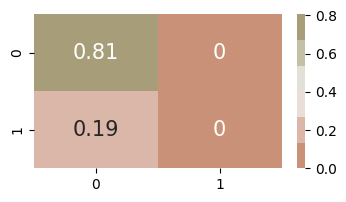

In [62]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
cmap1 = sns.diverging_palette(751,75,  s=40, l=65, n=6)
plt.subplots(figsize=(4,2))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
cf_matrix